In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


# Importing Important Libraries

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectFromModel, RFE
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Loading The Datasets

In [3]:
df = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')
df_test = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')


# Performing EDA

In [4]:
df.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [5]:
df.tail()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
19995,5100 W ADAMS BL,NaN,34.0334,-118.3523,05/24/2020 12:00:00 AM,05/24/2020 12:00:00 AM,700.0,3.0,Southwest,303.0,...,51.0,M,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Violent Crimes
19996,16900 ROSCOE BL,NaN,34.2212,-118.5011,12/25/2020 12:00:00 AM,12/25/2020 12:00:00 AM,259.0,10.0,West Valley,1008.0,...,0.0,M,W,301.0,GAS STATION,NaN,NaN,IC,Invest Cont,Property Crimes
19997,1000 S SHENANDOAH ST,NaN,34.0571,-118.3815,09/25/2020 12:00:00 AM,09/25/2020 12:00:00 AM,1400.0,8.0,West LA,849.0,...,42.0,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,Property Crimes
19998,300 W SEPULVEDA ST,NaN,33.7451,-118.2835,06/10/2020 12:00:00 AM,06/10/2020 12:00:00 AM,600.0,5.0,Harbor,558.0,...,76.0,F,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Crimes against Public Order
19999,DALTON AV,VERNON AV,34.0037,-118.3034,02/18/2020 12:00:00 AM,02/17/2020 12:00:00 AM,1800.0,3.0,Southwest,397.0,...,0.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes


In [6]:
df.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


In [7]:
print(df.shape)
print(df_test.shape)

(20000, 22)
(5000, 21)


In [8]:
df.dtypes

Location                  object
Cross_Street              object
Latitude                 float64
Longitude                float64
Date_Reported             object
Date_Occurred             object
Time_Occurred            float64
Area_ID                  float64
Area_Name                 object
Reporting_District_no    float64
Part 1-2                 float64
Modus_Operandi            object
Victim_Age               float64
Victim_Sex                object
Victim_Descent            object
Premise_Code             float64
Premise_Description       object
Weapon_Used_Code         float64
Weapon_Description        object
Status                    object
Status_Description        object
Crime_Category            object
dtype: object

In [9]:
df.columns

Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported',
       'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status',
       'Status_Description', 'Crime_Category'],
      dtype='object')

In [10]:
df.isnull().sum()
#Dropping the Cross-Street column as it have many null values

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

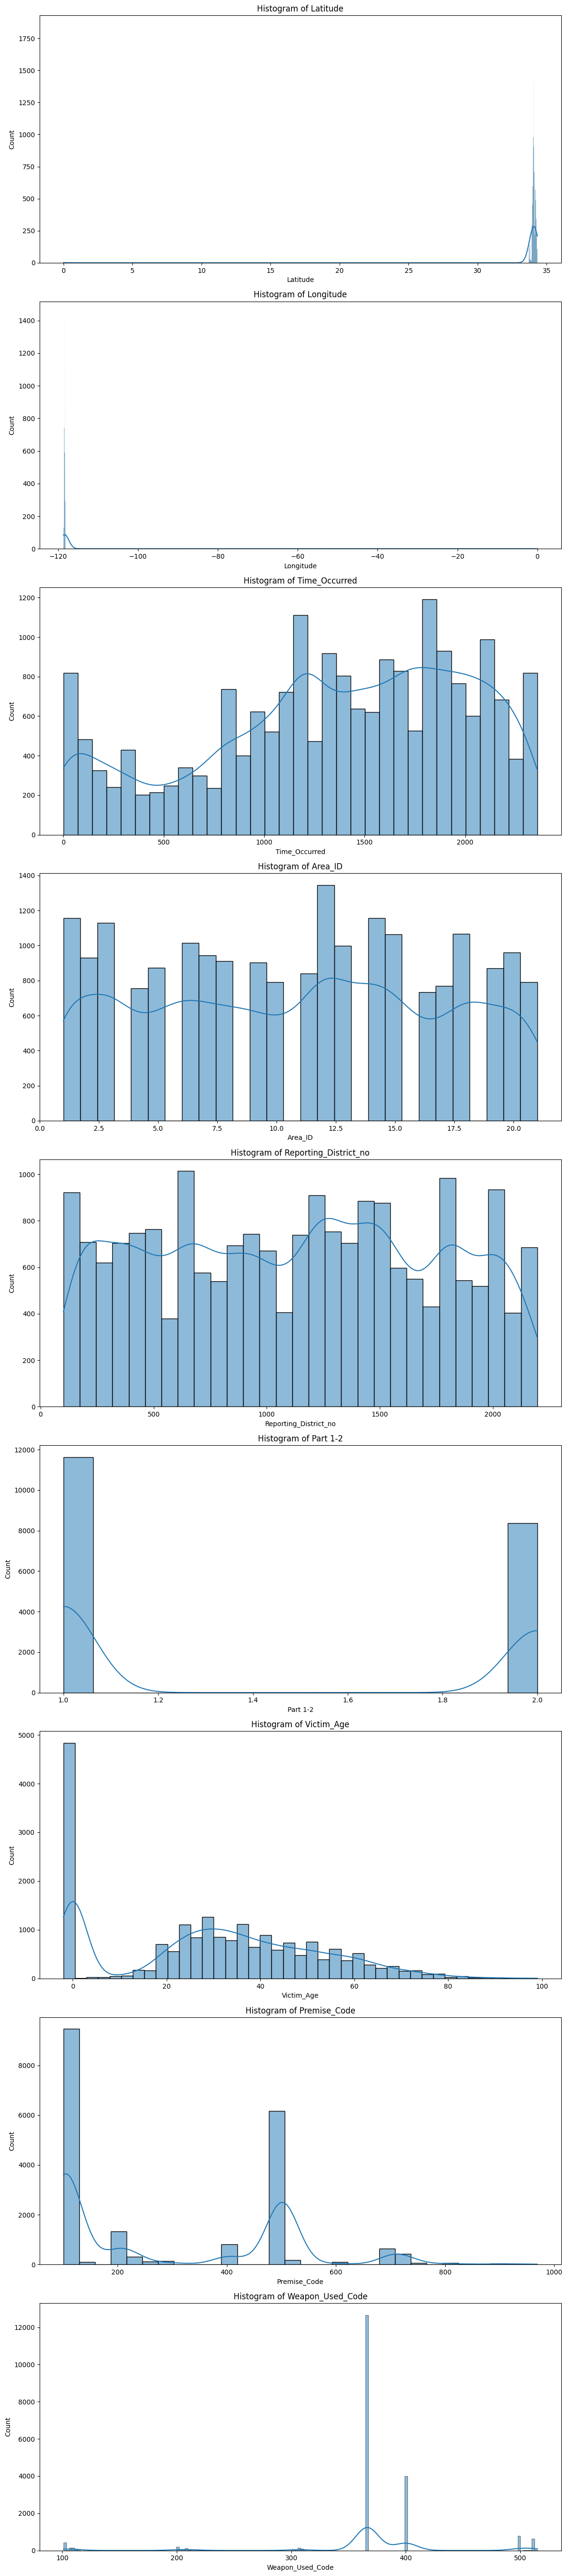

In [11]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

numerical_cols = df.select_dtypes(include=['float64'])

numerical_cols.fillna(numerical_cols.mean(), inplace=True)

num_features = numerical_cols.shape[1]

fig, axes = plt.subplots(num_features, 1, figsize=(12, num_features * 6))

if num_features == 1:
    axes = [axes]

for i, column in enumerate(numerical_cols.columns):
    sns.histplot(data=numerical_cols, x=column, ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()
# The graphs are plotted to do the numerical analysis of features


In [12]:
def encode_and_correlate(df, col1, col2):
    le = LabelEncoder()
    df_encoded = df[[col1, col2]].copy()
    df_encoded[col1] = le.fit_transform(df[col1])
    df_encoded[col2] = le.fit_transform(df[col2])
    correlation = df_encoded[col1].corr(df_encoded[col2])
    return correlation

le=LabelEncoder()

In [13]:
corr_status = encode_and_correlate(df, 'Status', 'Status_Description')
print(f"Correlation between Status and Status_Description: {corr_status:.4f}")
# Dropping Status Description as one is reductant 

Correlation between Status and Status_Description: 1.0000


In [14]:
corr_status = encode_and_correlate(df, 'Victim_Sex', 'Victim_Descent')
print(f"Correlation between Vicitim_Sex and Victim_Descent: {corr_status:.4f}")

Correlation between Vicitim_Sex and Victim_Descent: 0.5463


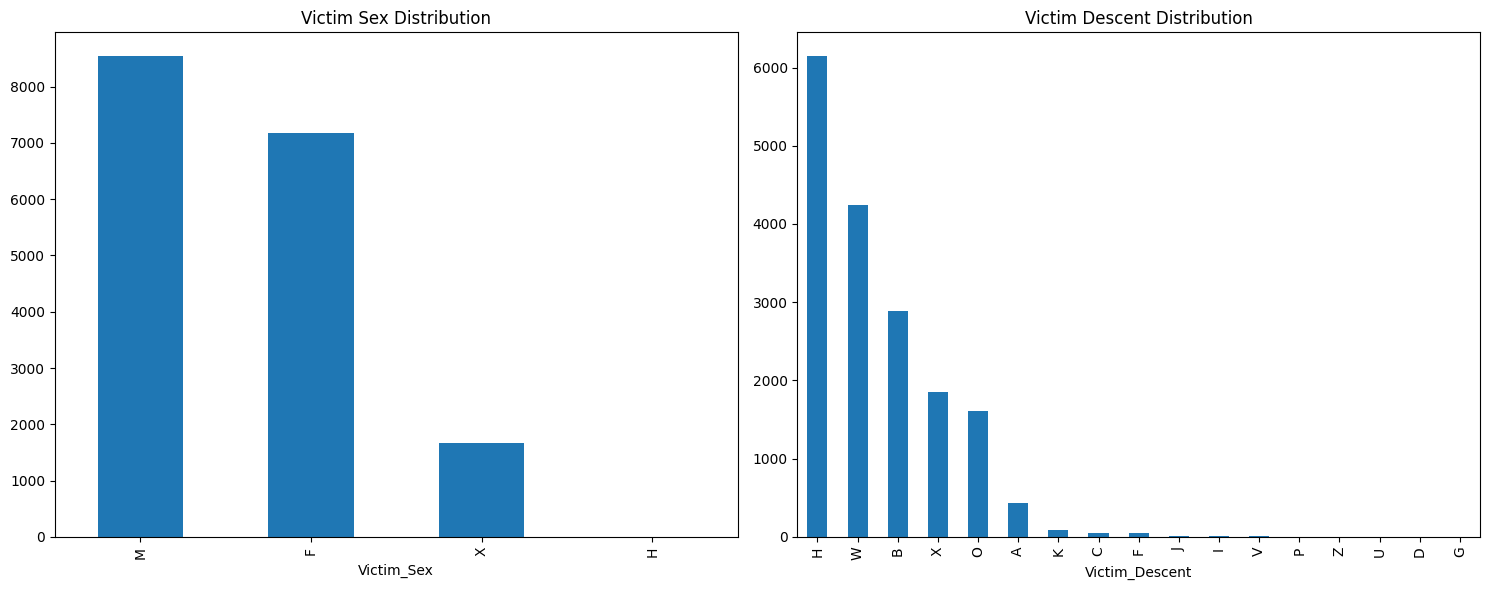

In [15]:
#Graph comparison between Victim_sex and Victim_descent
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

df['Victim_Sex'].value_counts().plot(kind='bar', ax=ax1, title='Victim Sex Distribution')
df['Victim_Descent'].value_counts().plot(kind='bar', ax=ax2, title='Victim Descent Distribution')

plt.tight_layout()
plt.show()

In [16]:

df_copy = df[['Weapon_Description', 'Weapon_Used_Code']].copy()

df_copy['Weapon_Description_Encoded'] = le.fit_transform(df_copy['Weapon_Description'])


corr_status = df_copy['Weapon_Description_Encoded'].corr(df_copy['Weapon_Used_Code'])

print(f"Correlation between Weapon_Used_Code and Weapon_Description: {corr_status:.4f}")

Correlation between Weapon_Used_Code and Weapon_Description: 0.6658


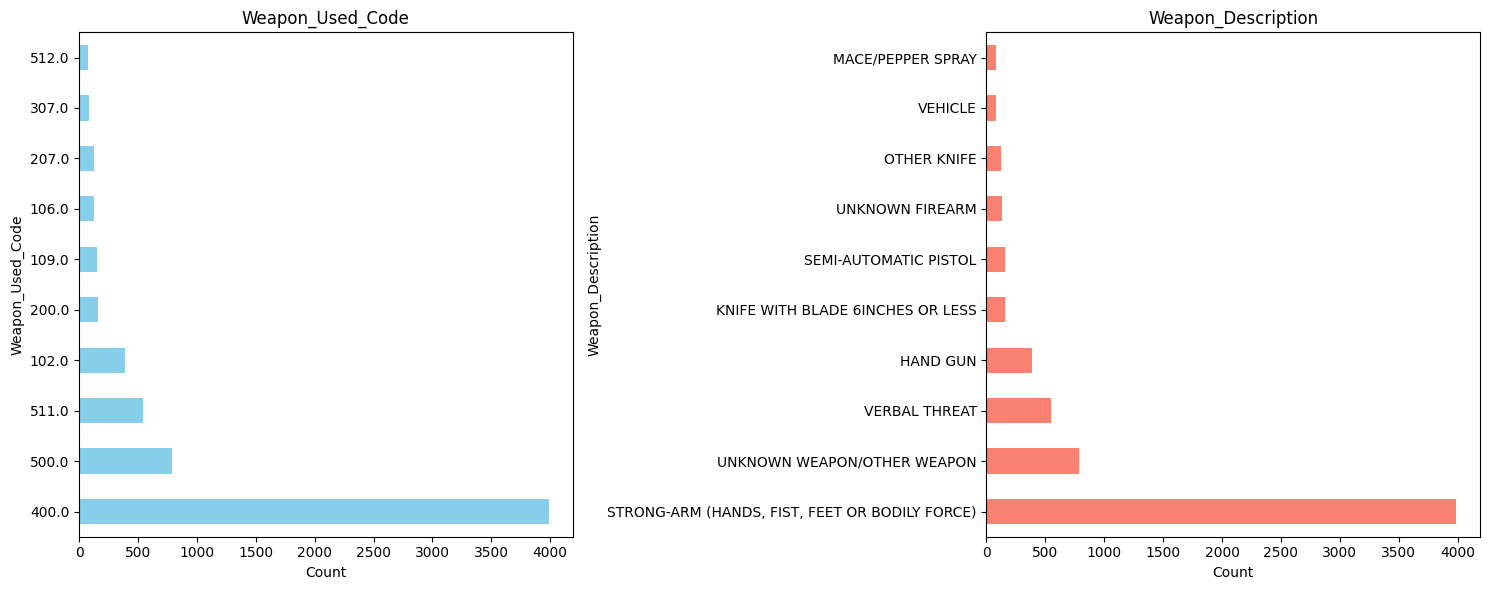

In [17]:
#Graph between Weapon Description and Weapon Used Code
top_n = 10
top_weapon_used = df['Weapon_Used_Code'].value_counts().head(top_n)
top_weapon_desc = df['Weapon_Description'].value_counts().head(top_n)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

top_weapon_used.plot(kind='barh', ax=ax1, color='skyblue', title='Weapon_Used_Code')
ax1.set_xlabel('Count')

top_weapon_desc.plot(kind='barh', ax=ax2, color='salmon', title='Weapon_Description')
ax2.set_xlabel('Count')

plt.tight_layout()
plt.show()
# Dropping Weapon Description as it is very similar to Weapon Used Code 

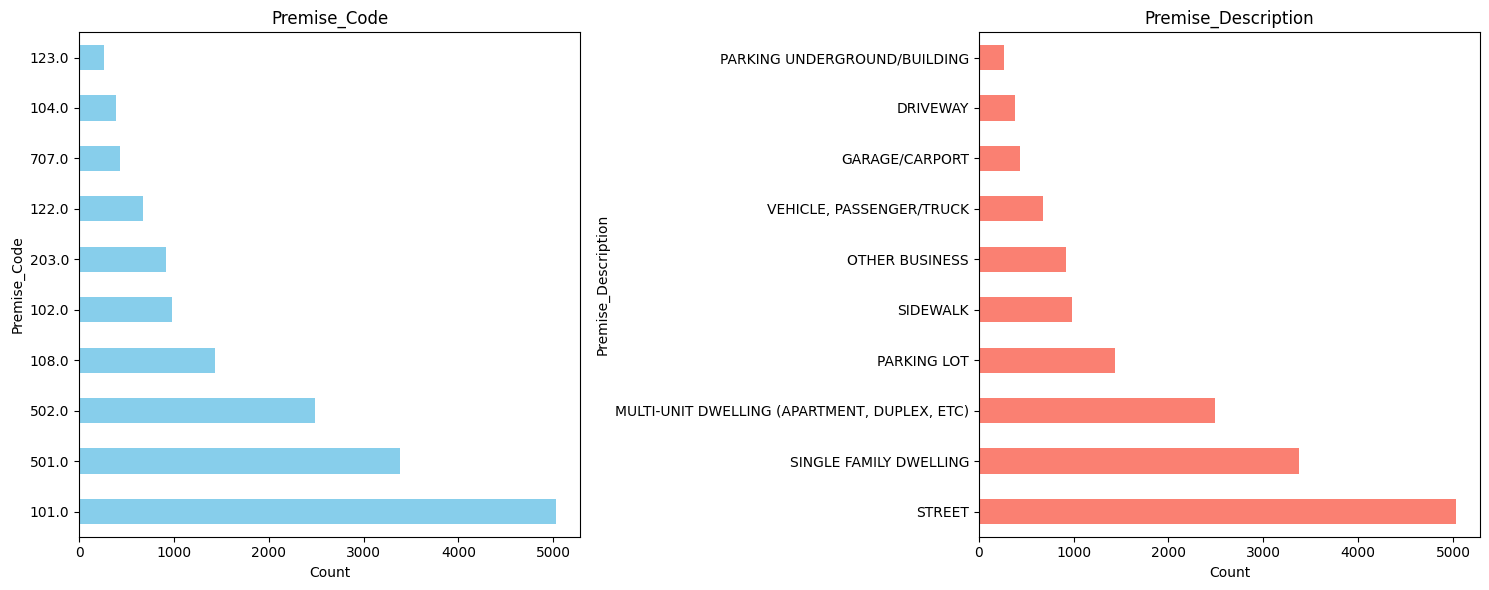

In [18]:
top_n = 10
top_weapon_used = df['Premise_Code'].value_counts().head(top_n)
top_weapon_desc = df['Premise_Description'].value_counts().head(top_n)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

top_weapon_used.plot(kind='barh', ax=ax1, color='skyblue', title='Premise_Code')
ax1.set_xlabel('Count')

top_weapon_desc.plot(kind='barh', ax=ax2, color='salmon', title='Premise_Description')
ax2.set_xlabel('Count')

plt.tight_layout()
plt.show()
#Dropping Premise Description

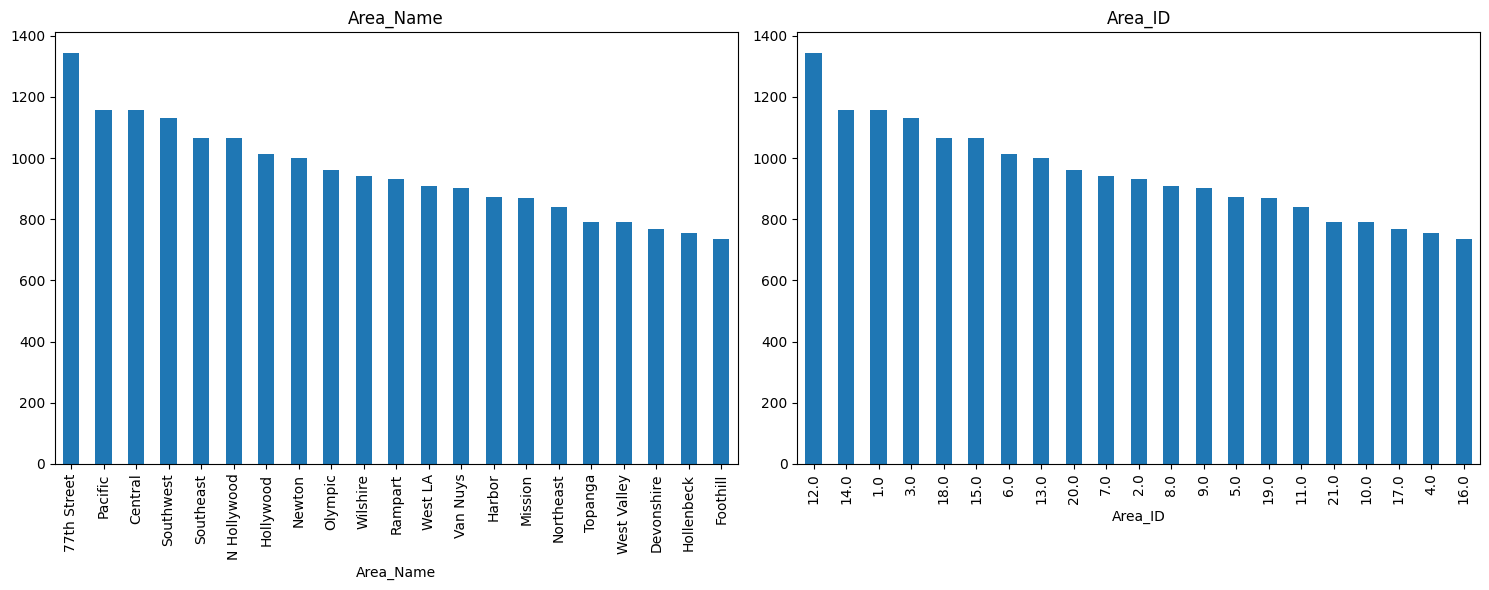

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

df['Area_Name'].value_counts().plot(kind='bar', ax=ax1, title='Area_Name')
df['Area_ID'].value_counts().plot(kind='bar', ax=ax2, title='Area_ID')

plt.tight_layout()
plt.show()
#Dropping Area Name

In [20]:
df_copy = df[['Area_ID', 'Reporting_District_no']].copy()


corr_status = df_copy['Area_ID'].corr(df_copy['Reporting_District_no'])

print(f"Correlation between Area_ID and Reporting_District_no: {corr_status:.4f}")
#Dropping Area ID

Correlation between Area_ID and Reporting_District_no: 0.9990


In [21]:
print(df['Victim_Age'].value_counts())
df = df[df['Victim_Age'] >0]
df_test=df_test[df_test['Victim_Age']>0]
#Removing Outliers

Victim_Age
 0.0     4828
 30.0     448
 31.0     446
 26.0     442
 29.0     425
         ... 
 98.0       2
-2.0        2
 92.0       2
 96.0       2
 94.0       2
Name: count, Length: 100, dtype: int64


In [22]:
def process_date_time(df):
    df['Date_Reported'] = pd.to_datetime(df['Date_Reported'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
    df['Date_Occurred'] = pd.to_datetime(df['Date_Occurred'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
    df['Year_Reported'] = df['Date_Reported'].dt.year
    df['Month_Reported'] = df['Date_Reported'].dt.month
    df['Day_Reported'] = df['Date_Reported'].dt.day

    
    def parse_time(time_value):
        try:
            if np.isnan(time_value):
                return np.nan
            time_str = str(int(time_value)).zfill(4)
            return pd.to_datetime(time_str, format='%H%M').hour
        except Exception:
            return np.nan

    df['Hour_Occurred'] = df['Time_Occurred'].apply(parse_time)
    
    # Drop original columns
    return df.drop(columns=['Date_Reported', 'Date_Occurred', 'Time_Occurred'])

In [23]:
len(df['Modus_Operandi'].unique())

9362

In [24]:
modus_operandi_split = df['Modus_Operandi'].str.split(' ', expand=True)

modus_operandi_split.columns = [f'Modus_Operandi_{i+1}' for i in modus_operandi_split.columns]

df = df.join(modus_operandi_split)
df_test=df_test.join(modus_operandi_split)

In [25]:
#Dropping Location as Latitude and Longitude is enough
X = df.drop(columns=['Crime_Category','Cross_Street','Area_Name','Premise_Description','Weapon_Description','Status_Description','Location','Area_ID','Modus_Operandi'])
X=process_date_time(X)
df_test=df_test.drop(columns=['Cross_Street','Area_Name','Premise_Description','Weapon_Description','Status_Description','Location','Area_ID','Modus_Operandi'])
df_test=process_date_time(df_test)
y = df['Crime_Category']
print(X.shape)
X

(15166, 24)


,Latitude,Longitude,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status,...,Modus_Operandi_5,Modus_Operandi_6,Modus_Operandi_7,Modus_Operandi_8,Modus_Operandi_9,Modus_Operandi_10,Year_Reported,Month_Reported,Day_Reported,Hour_Occurred
0,34.1522,-118.3910,1563.0,1.0,75.0,M,W,101.0,NaN,IC,...,None,None,None,None,None,None,2020,3,9,18
1,34.0028,-118.2391,1367.0,1.0,41.0,M,H,216.0,400.0,IC,...,1822,0344,0416,0417,None,None,2020,2,27,13
2,34.0111,-118.2653,1343.0,2.0,67.0,M,B,501.0,NaN,IC,...,None,None,None,None,None,None,2020,8,21,6
3,34.2953,-118.4590,1924.0,1.0,61.0,M,H,101.0,NaN,IC,...,None,None,None,None,None,None,2020,11,8,18
5,34.1127,-118.1942,1118.0,2.0,50.0,M,H,502.0,400.0,AO,...,None,None,None,None,None,None,2020,1,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,34.2157,-118.4772,1018.0,1.0,59.0,F,H,108.0,NaN,IC,...,1420,0377,None,None,None,None,2020,4,9,15
19994,33.9401,-118.2744,1832.0,2.0,60.0,M,H,605.0,NaN,IC,...,None,None,None,None,None,None,2020,12,4,11
19995,34.0334,-118.3523,303.0,2.0,51.0,M,H,501.0,400.0,IC,...,None,None,None,None,None,None,2020,5,24,7
19997,34.0571,-118.3815,849.0,1.0,42.0,M,H,102.0,NaN,IC,...,None,None,None,None,None,None,2020,9,25,14


In [26]:
new_nf=X.select_dtypes(exclude='object').columns
new_cf=X.select_dtypes(include='object').columns
print(new_nf)
print(new_cf)

Index(['Latitude', 'Longitude', 'Reporting_District_no', 'Part 1-2',
       'Victim_Age', 'Premise_Code', 'Weapon_Used_Code', 'Year_Reported',
       'Month_Reported', 'Day_Reported', 'Hour_Occurred'],
      dtype='object')
Index(['Victim_Sex', 'Victim_Descent', 'Status', 'Modus_Operandi_1',
       'Modus_Operandi_2', 'Modus_Operandi_3', 'Modus_Operandi_4',
       'Modus_Operandi_5', 'Modus_Operandi_6', 'Modus_Operandi_7',
       'Modus_Operandi_8', 'Modus_Operandi_9', 'Modus_Operandi_10'],
      dtype='object')


In [27]:
feature_names=X.columns

In [28]:
y.unique()

array(['Property Crimes', 'Violent Crimes', 'Other Crimes',
       'Crimes against Public Order', 'Fraud and White-Collar Crimes',
       'Crimes against Persons'], dtype=object)

# Preprocessing

In [29]:
num_imputer=SimpleImputer(strategy='mean')
cat_imputer=SimpleImputer(strategy='most_frequent')
scaler=StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore')

In [30]:
num_trans=Pipeline(steps=[('imputer',num_imputer),('scaler',scaler)])
cat_trans=Pipeline(steps=[('imputer',cat_imputer),('encoder',encoder)])
preprocessor=ColumnTransformer(transformers=[('num',num_trans,new_nf),('cat',cat_trans,new_cf)])

In [31]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
#for regression
encoder_r=LabelEncoder()
y_train_r=encoder_r.fit_transform(y_train)
y_val_r=encoder_r.fit_transform(y_val)

In [33]:

X_train_p = preprocessor.fit_transform(X_train)
X_val_p = preprocessor.transform(X_val)


print("X_train_p shape:", X_train_p.shape)

X_train_p shape: (12132, 2256)


# Training The Models (CART, Bagging and Boosting, and MLP)

1. Random Forest Classifier

In [34]:
param_dist_rf = {
    'n_estimators': [100, 200,400],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10,None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4],
    'max_features': ['sqrt', 'log2'],
}


rf = RandomForestClassifier(random_state=42)


random_search_rf = RandomizedSearchCV(rf, param_dist_rf, n_iter=50, cv=3, n_jobs=-1, random_state=42)

random_search_rf.fit(X_train_p, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 4],
                                        'min_samples_split': [2, 10],
                                        'n_estimators': [100, 200, 400]},
                   random_state=42)

In [35]:
model1 = random_search_rf.best_estimator_

y_pred = model1.predict(X_val_p)

accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9050758075148319


2. XGB Classifier

In [36]:
param_grid = {
    'min_child_weight': [1, 5, 10],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01,0.001],
    'subsample': [0.6, 0.8, 1],
}

xgb = XGBClassifier(random_state=42)


# Setup RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(xgb,param_grid, n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
random_search_xgb.fit(X_train_p, y_train_r)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 81 is smaller than n_iter=100. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1]},
                   random_state=42, scoring='accuracy')

In [37]:
model2= random_search_xgb.best_estimator_
y_pred=model2.predict(X_val_p)
accuracy = accuracy_score(y_val_r, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9258404746209624


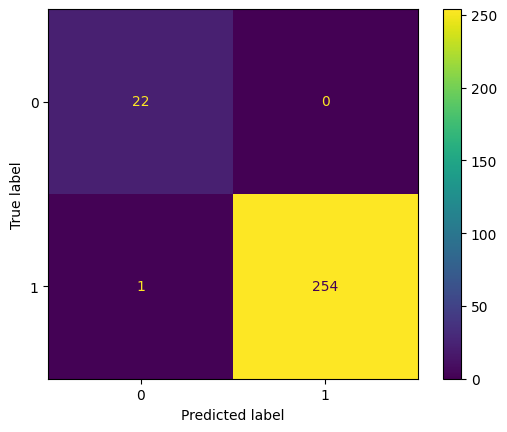

In [38]:
ConfusionMatrixDisplay.from_predictions(y_val_r,y_pred,labels=[0,1])
plt.show()

3. Bagging Classifier

In [39]:
param_grid_bagging = {
    'n_estimators': [50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.1,0.2,0.5, 1.0],
}
base_estimator = DecisionTreeClassifier(random_state=42)
bagging = BaggingClassifier(estimator=base_estimator, random_state=42)

random_search_bag = RandomizedSearchCV(bagging, param_grid_bagging, cv=5, scoring='accuracy', n_jobs=-1)

random_search_bag.fit(X_train_p, y_train)

RandomizedSearchCV(cv=5,
                   estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                               random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_features': [0.1, 0.2, 0.5, 1.0],
                                        'max_samples': [0.5, 1.0],
                                        'n_estimators': [50, 100]},
                   scoring='accuracy')

In [40]:
model3= random_search_bag.best_estimator_
y_pred=model3.predict(X_val_p)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9251812788398154


In [41]:
target=['Property Crimes', 'Violent Crimes', 'Other Crimes','Crimes against Public Order', 'Fraud and White-Collar Crimes','Crimes against Persons']
print(classification_report(y_val, y_pred, target_names=target))

                               precision    recall  f1-score   support

              Property Crimes       0.68      0.48      0.56        44
               Violent Crimes       0.82      0.81      0.82       325
                 Other Crimes       0.90      0.93      0.92       253
  Crimes against Public Order       0.38      0.10      0.16        30
Fraud and White-Collar Crimes       0.99      0.95      0.97      1481
       Crimes against Persons       0.88      0.97      0.92       901

                     accuracy                           0.93      3034
                    macro avg       0.77      0.71      0.72      3034
                 weighted avg       0.92      0.93      0.92      3034



4. Gradient Boosting Classifier

In [42]:
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'subsample': [0.8, 1.0],
}

gb = GradientBoostingClassifier(random_state=42)

random_search_gb = RandomizedSearchCV(gb, param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
random_search_gb.fit(X_train_p, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1],
                                        'max_depth': [3, 5],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100],
                                        'subsample': [0.8, 1.0]},
                   scoring='accuracy')

In [43]:
model4= random_search_gb.best_estimator_
y_pred=model4.predict(X_val_p)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9301252471984179


In [44]:
cm = confusion_matrix(y_val, y_pred)
print('Confusion matrix : \n', cm)

Confusion matrix : 
 [[  18    0    1    2    0   23]
 [   1  271   10    1    1   41]
 [   2   12  236    1    2    0]
 [   0   19    4    3    3    1]
 [   0    5    1    2 1429   44]
 [  12   14    0    1    9  865]]


# Submiting the model with highest accuracy

In [45]:
sample = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv")

In [46]:
X_test = preprocessor.transform(df_test)
print(X_test.shape)


(3809, 2256)


In [47]:
y_pred_final = model2.predict(X_test)
print(y_pred_final)
y_pred_=encoder_r.inverse_transform(y_pred_final)
print(y_pred_)
y_pred_.shape

[5 4 4 ... 5 5 4]
['Violent Crimes' 'Property Crimes' 'Property Crimes' ... 'Violent Crimes'
 'Violent Crimes' 'Property Crimes']


(3809,)

In [48]:
submission = pd.DataFrame({"ID": np.arange(1, len(y_pred_) + 1), 
                           "Crime_Category": y_pred_,
                          }
                         ) 

submission.to_csv('submission.csv',index=False)

In [49]:
5000*[np.NaN]

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan